In [79]:
# For the second part, we will look at the whole picture of the funnel conversion 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 350)
  
#read the files(
data = pd.read_csv('Funnel_Analysis_Data/processed/funnel_cleaned.csv')
data.head(10)

,Unnamed: 0,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,4,537909,2015-01-15,Desktop,Male,1,0,0,0
5,5,993454,2015-03-03,Desktop,Male,1,0,0,0
6,6,377150,2015-04-15,Desktop,Female,1,1,0,0
7,7,137258,2015-01-27,Mobile,Male,1,0,0,0
8,8,608249,2015-04-12,Desktop,Female,1,0,0,0
9,9,615615,2015-02-24,Mobile,Female,1,1,0,0


In [16]:
# Complete Funnel View. in percentaqge
data[['page_home','page_search','page_payment','page_confirmation']].agg({'mean'}).round(4)*100

,page_home,page_search,page_payment,page_confirmation
mean,100.0,50.0,6.67,0.5


In [19]:
# ###
# From the page conversion data, we can glean the following insights:

# Drop-off Rates:

# Users start at the "home" page with 100% representation, but only 50% of them proceed to the "search" page.
# From the "search" page, there is a significant drop to the "payment" page, with only 6.67% of users reaching it.
# Finally, a mere 0.5% of users make it to the "confirmation" page.
# Conversion Funnel:

# The data represents a typical conversion funnel, where users move through a sequence of pages towards a desired action (in this case, likely completing a transaction).
# It's crucial to analyze and optimize each step of this funnel to improve overall conversion rates.
# Potential Issues:

# The drop-off from the "home" to "search" page is quite significant (50%). This could indicate issues on the "home" page, such as poor user experience or unclear call-to-action.
# Similarly, the drop from "search" to "payment" is substantial (around 86%). This may suggest problems with the "search" page design or checkout process.
# The sharp decline from "payment" to "confirmation" is also notable, indicating that there might be obstacles or concerns during the payment process.
# Areas for Improvement:

# To improve conversion rates, it's essential to analyze user behavior and feedback at each step.
# A/B testing, user surveys, and usability studies can help identify specific pain points and areas for enhancement.
# Enhancing the user experience, simplifying the checkout process, and addressing concerns can potentially increase conversions.
# Further Analysis:

# While these insights provide an overview, a deeper dive into user interactions and behaviors on each page is necessary.
# Examining factors like load times, content relevance, and device-specific issues can reveal more precise reasons for drop-offs.
# ###


In [29]:
# Lets deep dive 
data.groupby('sex')[['page_home','page_search','page_payment','page_confirmation']].agg({'mean'}).round(4)*100

,page_home,page_search,page_payment,page_confirmation
,mean,mean,mean,mean
sex,,,,
Female,100.0,50.31,6.88,0.53
Male,100.0,49.69,6.46,0.47


In [33]:
data.groupby('sex')[['page_home','page_search','page_payment','page_confirmation']].agg({'count'})

,page_home,page_search,page_payment,page_confirmation
,count,count,count,count
sex,,,,
Female,45075,45075,45075,45075
Male,45325,45325,45325,45325


In [31]:
data.groupby('device')[['page_home','page_search','page_payment','page_confirmation']].agg({'mean'}).round(4)*100

,page_home,page_search,page_payment,page_confirmation
,mean,mean,mean,mean
device,,,,
Desktop,100.0,50.0,5.0,0.25
Mobile,100.0,50.0,10.0,1.00


In [34]:
data.groupby('device')[['page_home','page_search','page_payment','page_confirmation']].agg({'count'})

,page_home,page_search,page_payment,page_confirmation
,count,count,count,count
device,,,,
Desktop,60200,60200,60200,60200
Mobile,30200,30200,30200,30200


In [32]:
# Insights

# 1. Conversion rate for Mobile phone is higher by 4X. 
# 2. We also see that search to payment is better for mobile
# 3. Desktop has 2x more users

In [40]:
 ## Checking complete funnel

print(data.groupby('device').apply(
    lambda x: pd.Series(
        {
            'to_search' : x['page_search'].mean()/x['page_home'].mean()
            ,'to_payment' : x['page_payment'].mean()/x['page_search'].mean()
            ,'to_confirmation' : x['page_confirmation'].mean()/x['page_payment'].mean()
        }
    )
))

         to_search  to_payment  to_confirmation
device                                         
Desktop        0.5         0.1         0.049834
Mobile         0.5         0.2         0.100000


In [41]:
# The main Difference is coming from the last 2 pages, lets do sometime series to visualize it, we do this because aggregates are not that important, because they are a current snapshot in time 


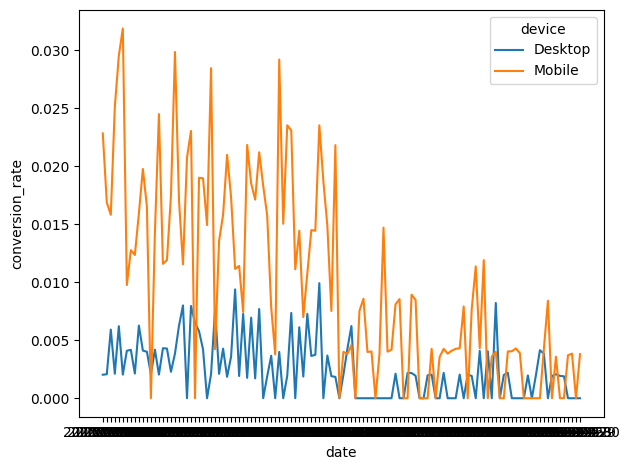

In [45]:
conversion_ts = data.groupby(['device','date'])['page_confirmation'].mean().reset_index(name='conversion_rate')
g = sns.lineplot(x='date',hue='device',y='conversion_rate',data=conversion_ts)

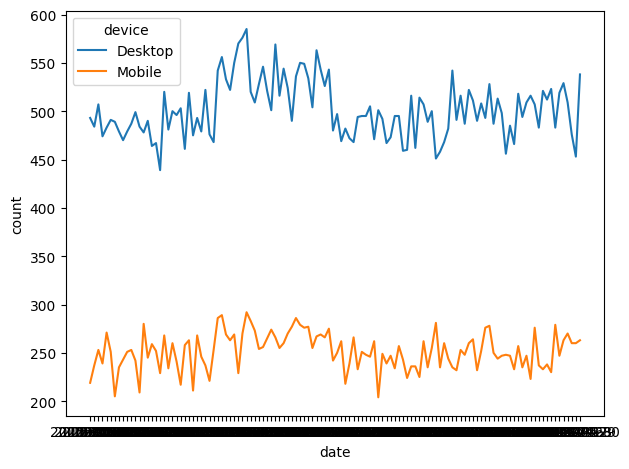

In [47]:
# Lets count plot it, to see if denominators remained stable
visitors_ts = data.groupby(['device','date'])['page_confirmation'].count().reset_index(name='count')
v = sns.lineplot(x='date',y='count',hue='device',data=visitors_ts)

In [48]:
## We see that the conversion rate has dropped, lets see if its related to a particular page

In [53]:
pages_ts = (data.groupby(['device','date']).apply(
        lambda x : pd.Series(
        {
            'to_search' : x['page_search'].mean()/x['page_home'].mean(),
            'to_payment' : x['page_payment'].mean()/x['page_search'].mean(),
            'to_confirmation' : x['page_confirmation'].mean()/x['page_payment'].mean()
        })
        )).reset_index()

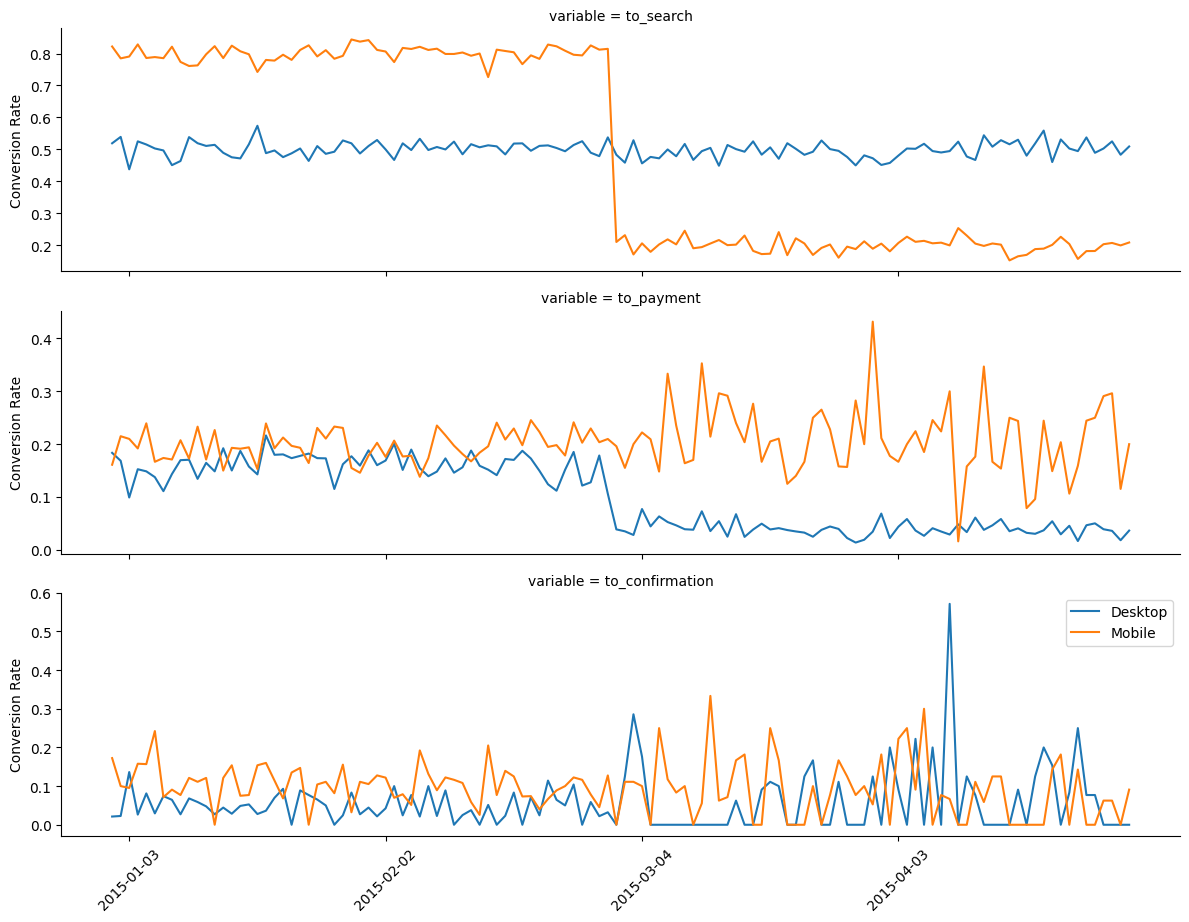

In [75]:
#Make the dataset long for the plot
funnel = pd.melt(pages_ts,id_vars=['date', 'device'])
#Plot it
g = sns.FacetGrid(funnel, hue="device", row="variable", aspect=4, sharey=False)
g.map(sns.lineplot, "date", "value")

### This is a great way to include dates in Python and summarize using monthly and weekly 
g.set_axis_labels("", "Conversion Rate")
g.set(xticks=funnel.date[2::30].unique())
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [73]:
# Insights :
# So we see that confirmation remains flat, but desktop and mobile saw a slump in March, Desktop and Mobile saw it for different pages though
# Desktop saw a bouncers in search to payment which is more troublesome (because people who search have a )
# Mobile saw a hige uptick in bounces on homepage to search page

In [76]:
# So what should we focus on? Lets find out